# Introduction to objected-oriented programming

In this notebook, we will address the concept of Python classes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mcmm.example import generate_test_data

## The simple approach (cells + attentiveness)

First step: we run `generate_test_data()` from `mcmm.example` to generate a time series.

In [2]:
traj = generate_test_data(traj_length=100000, num_trajs=1)[0]

Second step: we build a 2D histogram to visualise how often a bin has been visited in the trajectory.

In [3]:
h, xedges, yedges = np.histogram2d(traj[:, 0], traj[:, 1], bins=(50, 50))
xcenters = xedges[:-1] + 0.5 * (xedges[1:] - xedges[:-1])
ycenters = yedges[:-1] + 0.5 * (yedges[1:] - yedges[:-1])
x, y = np.meshgrid(xcenters, ycenters, indexing='ij')

Third step: we make a nice plot of the histogram.

[None, None]

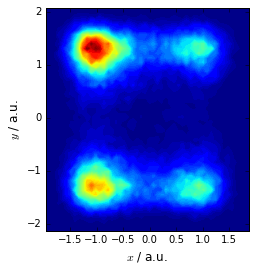

In [4]:
fig, ax = plt.subplots()
ax.contourf(x, y, h, np.linspace(h.min(), h.max(), 60))
ax.set_xlabel(r"$x$ / a.u.", fontsize=12)
ax.set_ylabel(r"$y$ / a.u.", fontsize=12)
ax.set(aspect='equal', adjustable='box-forced')

Fourth step: we play around with the settings and rerun cells, until we understand what's going on.

## The object-oriented approach

First step: we write a class to encapsulate data and analysis.

In [5]:
class Example(object):
    def __init__(self, traj_length=10000):
        self.traj_length = traj_length
        self._traj = None
    @property
    def traj(self):
        if self._traj is None:
            self._traj = generate_test_data(traj_length=self.traj_length, num_trajs=1)[0]
        return self._traj
    def plot_histogram(self, bins, ax=None):
        h, xedges, yedges = np.histogram2d(self.traj[:, 0], self.traj[:, 1], bins=bins)
        xcenters = xedges[:-1] + 0.5 * (xedges[1:] - xedges[:-1])
        ycenters = yedges[:-1] + 0.5 * (yedges[1:] - yedges[:-1])
        x, y = np.meshgrid(xcenters, ycenters, indexing='ij')
        if ax is None:
            fig, ax = plt.subplots()
        ax.contourf(x, y, h, np.linspace(h.min(), h.max(), 60))
        ax.set_xlabel(r"$x$ / a.u.", fontsize=12)
        ax.set_ylabel(r"$y$ / a.u.", fontsize=12)
        ax.set(aspect='equal', adjustable='box-forced')
        return ax

Second step: we instanciate an object.

In [6]:
example = Example(traj_length=1000000)

Third step: we run the `plot_histogram()` method of our `example` object.

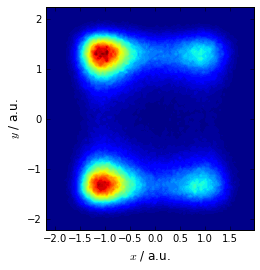

In [7]:
ax = example.plot_histogram((100, 100))

Fourth step: we play around with the settings and rerun cells, until we understand what's going on.

## A documented class

We still have to add some documentation to our class:

In [ ]:
class Example(object):
    r"""An example class to encapsulate trajectory data and histogram visualisation."""
    def __init__(self, traj_length=10000):
        r"""
        Parameters
        ----------
        traj_length : in, optional, default=10000
            Number of samples in the trajectory.
        """
        self.traj_length = traj_length
        self._traj = None
    @property
    def traj(self):
        r"""Compute the trajectory on demand.
        
        Returns
        -------
        traj : numpy.ndarray(shape=(traj_length, 2))
            Generated trajectory with traj_length time steps.
        """
        if self._traj is None:
            self._traj = generate_test_data(traj_length=self.traj_length, num_trajs=1)[0]
        return self._traj
    def plot_histogram(self, bins, ax=None):
        r"""Make a 2D histogram plot.
        
        Parameters
        ----------
        bins : (int, int)
            Number of bins along x and y.
        ax : matplotlib Axes object, optional, default=None
            Target axis for plotting; will be created if ax=None.
        
        Returns
        -------
        ax : matplotlib Axes object
            Axis object with the 2D histogram plot.
        """
        h, xedges, yedges = np.histogram2d(self.traj[:, 0], self.traj[:, 1], bins=bins)
        xcenters = xedges[:-1] + 0.5 * (xedges[1:] - xedges[:-1])
        ycenters = yedges[:-1] + 0.5 * (yedges[1:] - yedges[:-1])
        x, y = np.meshgrid(xcenters, ycenters, indexing='ij')
        if ax is None:
            fig, ax = plt.subplots()
        ax.contourf(x, y, h, np.linspace(h.min(), h.max(), 60))
        ax.set_xlabel(r"$x$ / a.u.", fontsize=12)
        ax.set_ylabel(r"$y$ / a.u.", fontsize=12)
        ax.set(aspect='equal', adjustable='box-forced')
        return ax